# Definitions

In [5]:
from aseMolec.zenExplorer import ze

recIDs = [10835267, 10712131, 10890165]
with open("api.key", "r") as keyFile:
    ACCESS_TOKEN = keyFile.readline().rstrip()

ze = ze(ACCESS_TOKEN, recIDs)
ze.cache_all_data()

In [ ]:
import os
import glob
import numpy as np
from aseMolec import pltProps as pp

def get_all_thermo(fbase):
    dat = {}
    flist = np.sort(glob.glob('.cache/'+fbase+'/*.thermo'))
    for f in flist:
        aux = os.path.basename(f)
        key = os.path.splitext(aux)[0]
        dat.update({key: pp.loadtxttag(f)})
    return dat

dat1 = get_all_thermo('10712131/MDSims_1000Atoms_05fs_MACE_SD22NQ_wB97X')
dat2 = get_all_thermo('10712131/MDSims_1000Atoms_1fs_MACE_IBM23_B97')
dat3 = get_all_thermo('10712131/MDSims_1000Atoms_1fs_MACE_SD22NQ_B97')
dat4 = get_all_thermo('10835267/MDSims_1000Atoms_1000ps_300K_NPT_Gen16DTS_PBED3')

pp.rename_key(dat4, 'TimeStep', 'Time')
pp.rename_key(dat4, 'v_mdensity', 'Density')
pp.rename_key(dat4, 'c_compMSD[4]', 'MSD')

pp.convert_units(dat1, 'Time', 'ps', 0.001)
pp.convert_units(dat2, 'Time', 'ps', 0.001)
pp.convert_units(dat3, 'Time', 'ps', 0.001)
pp.convert_units(dat4, 'Time', 'ps', 0.001)

def_cols = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
pp.convert_units(dat4, 'Density', 'g/cm$^3$', 1.0)
pp.convert_units(dat4, 'MSD', 'A$^2$', 1.0)


# Compare MD trajectories

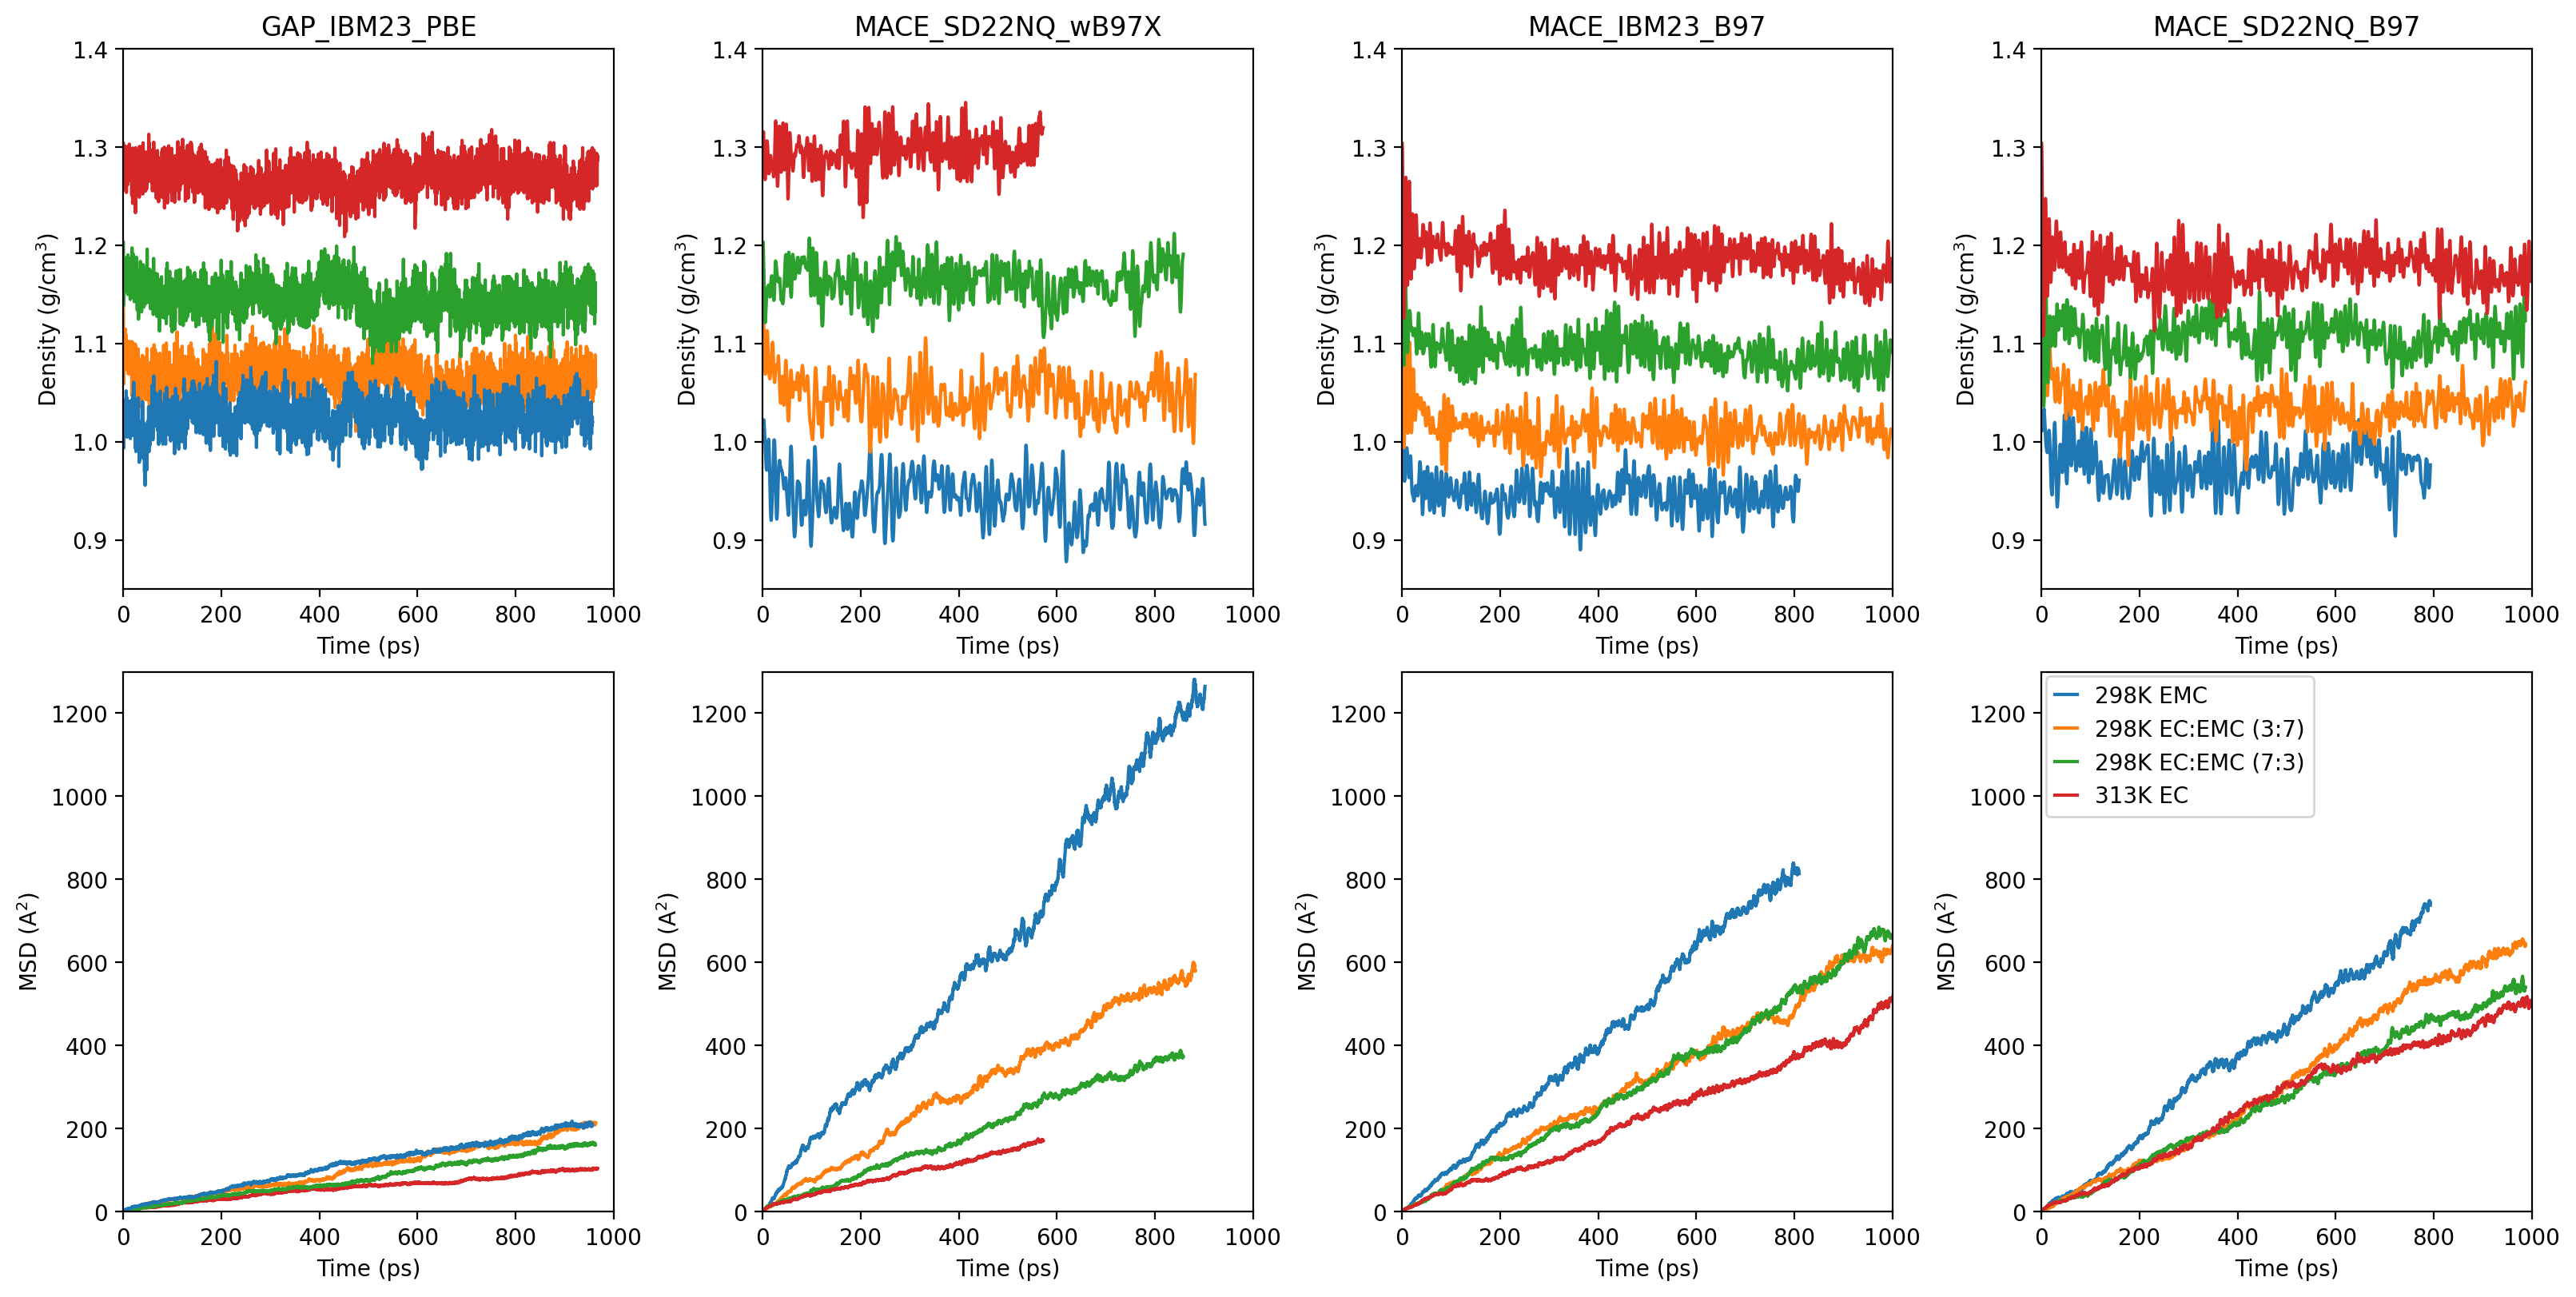

In [ ]:
from matplotlib import pyplot as plt
from aseMolec import pltProps as pp
import ase.units
densfact = (ase.units.m/1.0e2)**3/ase.units.mol

fig, axes = plt.subplot_mosaic(mosaic='ABCD;EFGH', figsize=(16,8), dpi=200, layout='constrained')

# Density

plt.sca(axes['A'])
for i, k in enumerate(dat4):
    pp.simpleplot(dat4[k], 3, 4, color=def_cols[i])
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('GAP_IBM23_PBE')

plt.sca(axes['B'])
for k in dat1:
    pp.simpleplot(dat1[k], 0, 2)
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('MACE_SD22NQ_wB97X')

plt.sca(axes['C'])
for k in dat2:
    pp.simpleplot(dat2[k], 0, 2)
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('MACE_IBM23_B97')

plt.sca(axes['D'])
for k in dat3:
    pp.simpleplot(dat3[k], 0, 2)
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('MACE_SD22NQ_B97')

# Diffusivity

plt.sca(axes['E'])
for i, k in enumerate(dat4):
    pp.simpleplot(dat4[k], 3, 5, color=def_cols[i])
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.sca(axes['F'])
for k in dat1:
    pp.simpleplot(dat1[k], 0, 5)
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.sca(axes['G'])
for k in dat2:
    pp.simpleplot(dat2[k], 0, 5)
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.sca(axes['H'])
for k in dat3:
    pp.simpleplot(dat3[k], 0, 5)
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.legend(['298K EMC', '298K EC:EMC (3:7)', '298K EC:EMC (7:3)', '313K EC'], handlelength=1, loc='upper left', borderaxespad=0.2)


In [ ]:
import pandas as pd 

raw_data = {"regiment": ["Nighthawks", "Nighthawks", "Nighthawks", "Nighthawks",
                             "Dragoons", "Dragoons", "Dragoons", "Dragoons", "Scouts",
                             "Scouts", "Scouts", "Scouts"],
                "company": ["1st", "1st", "2nd", "2nd", "1st", "1st", "2nd",
                            "2nd","1st", "1st", "2nd", "2nd"],
                "Rating_Score": [4, 24, 94, 25, 4, 24, 24, 31, 2, 3, 2, 3],
                "Public_Score": [25, 94, 31, 2, 70, 25, 4, 24, 31, 2, 3, 4]} #dictionary of lists, the key is the header of the column

df = pd.DataFrame(raw_data)
df

,regiment,company,Rating_Score,Public_Score
0,Nighthawks,1st,4,25
1,Nighthawks,1st,24,94
2,Nighthawks,2nd,94,31
3,Nighthawks,2nd,25,2
4,Dragoons,1st,4,70
5,Dragoons,1st,24,25
6,Dragoons,2nd,24,4
7,Dragoons,2nd,31,24
8,Scouts,1st,2,31
9,Scouts,1st,3,2


In [ ]:
df = df.set_index(["regiment", "company"])
df

Rating_Score  Public_Score
regiment   company                            
Nighthawks 1st                 4            25
           1st                24            94
           2nd                94            31
           2nd                25             2
Dragoons   1st                 4            70
           1st                24            25
           2nd                24             4
           2nd                31            24
Scouts     1st                 2            31
           1st                 3             2
           2nd                 2             3
           2nd                 3             4

In [ ]:
df.swaplevel("regiment", "company")

Rating_Score  Public_Score
company regiment                              
1st     Nighthawks             4            25
        Nighthawks            24            94
2nd     Nighthawks            94            31
        Nighthawks            25             2
1st     Dragoons               4            70
        Dragoons              24            25
2nd     Dragoons              24             4
        Dragoons              31            24
1st     Scouts                 2            31
        Scouts                 3             2
2nd     Scouts                 2             3
        Scouts                 3             4

In [ ]:
source = [0, 0, 1, 1, 0]
target = [2, 3, 4, 5, 4]
value = [8, 2, 2, 8, 4]

import plotly.graph_objects as go

link = dict(source = source, target = target, value = value)
data = go.Sankey(link = link)

fig = go.Figure(data)

fig.show()